In [1]:
import pandas as pd
import re as re
import html

In [2]:
f1=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Threads.xlsx")

In [3]:
f2=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Incidents.xlsx")

In [4]:
f1.shape

(100001, 12)

In [5]:
f2.shape

(19409, 13)

In [6]:
f1.head()

,Threads,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer


In [7]:
f2.head()

,Incidents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value


In [8]:
header_row=0
f1.columns = f1.iloc[header_row]
f2.columns = f2.iloc[header_row]
f1=f1.drop(header_row)
f2=f2.drop(header_row)

In [9]:
f1.head()

,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [10]:
f2.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [11]:
f1.rename(columns={'Foreign Key':'Incident ID'}, inplace=True)
f2.rename(columns={'Category ID':'CategoryID'}, inplace=True)

In [12]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [13]:
f1["Text"]=f1["Text"].apply(lambda cw: remove_tags(cw))

In [14]:
f1.head()

,Incident ID,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [15]:
f2.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,CategoryID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [16]:
f2.CategoryID.unique()

array(['No Value', 'Update process', 'Oracle', 'Sharepoint',
       'Infrastructure', 'Telephony', 'Business Process', 'Contract',
       'CiviCRM', 'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [17]:
f3=f1[["Incident ID","Text"]].merge(f2[["Incident ID","Status","CategoryID"]],on="Incident ID",how="right")

In [18]:
f3.shape

(103323, 4)

In [19]:
f3.CategoryID.unique()

array(['No Value', 'Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Update process', 'Business Process', 'Contract', 'CiviCRM',
       'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [20]:
f3.head(10)

,Incident ID,Text,Status,CategoryID
0,2601.0,\n\n==================== text File Attachment ...,Solved,No Value
1,2601.0,"Ad, see the attachment.",Solved,No Value
2,2632.0,Agents are experiencing an issue with Rightnow...,Solved,No Value
3,2632.0,Emailed agents this week asking if anyone have...,Solved,No Value
4,2632.0,No one have supplied details of issue,Solved,No Value
5,2655.0,the phone display states \nNo service\nTrying ...,Solved,No Value
6,2655.0,"Had a look, appears to be a network port issue...",Solved,No Value
7,2666.0,I have come into work this evening to find tha...,Solved,No Value
8,2666.0,"Hi Paddy,\n\nI've called you a number of times...",Solved,No Value
9,2666.0,"Hi Steve, It’s all been sorted out with Alan’s...",Solved,No Value


In [21]:
null_columns=f3.columns[f3.isnull().any()]
f3[null_columns].isnull().sum()

0
Text    3323
dtype: int64

In [22]:
f3=f3[f3['CategoryID']!='No Value']

In [23]:
f3.shape

(13471, 4)

In [24]:
f3.CategoryID.unique()

array(['Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Update process', 'Business Process', 'Contract', 'CiviCRM',
       'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [25]:
f3['Text']=f3['Text'].str.replace('\n','')
f3['Text']=f3['Text'].str.replace('=','')

In [26]:
f3.head(10)

,Incident ID,Text,Status,CategoryID
28234,11751.0,Hi Mike As we discussed yesterday. We wish to...,Solved,Oracle
28235,11751.0,"Hi MikeThis one needs picking up please, Beth ...",Solved,Oracle
28236,11751.0,Response via E-mail:From: Mike Griffiths Sent:...,Solved,Oracle
28237,11751.0,Need to create a CR after speaking with Mike,Solved,Oracle
28238,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Oracle
28239,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Oracle
28240,11751.0,"Dear Joe,We are still awaiting an update from ...",Solved,Oracle
28241,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Oracle
28242,11751.0,"Dear Joe,We are still awaiting an update from ...",Solved,Oracle
28243,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Oracle


In [27]:
null_columns=f3.columns[f3.isnull().any()]
f3[null_columns].isnull().sum()

0
Text    950
dtype: int64

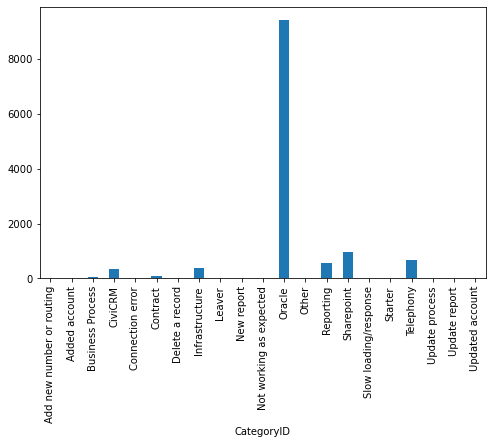

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
f3.groupby('CategoryID').Text.count().plot.bar(ylim=0)
plt.show()

In [29]:
f3 = f3[f3['Text'].notna()]

In [30]:
f3.shape

(12521, 4)

In [31]:
f3.CategoryID.unique()

array(['Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Update process', 'Business Process', 'Contract', 'CiviCRM',
       'Reporting'], dtype=object)

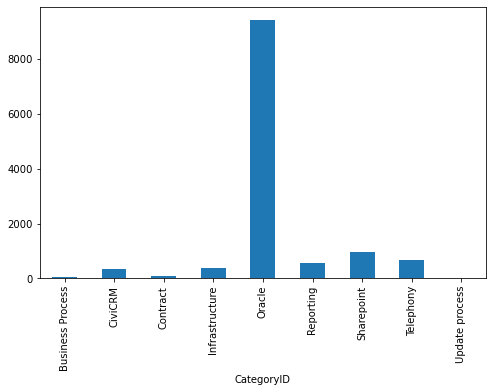

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
f3.groupby('CategoryID').Text.count().plot.bar(ylim=0)
plt.show()

In [33]:
def decode_text(string):
    result = html.unescape(string)
    return result

In [34]:
f3["Text"]=f3["Text"].apply(lambda cw: decode_text(cw))

In [35]:
f3['Text'] = f3['Text'].replace(r'https?:\/\/.\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [36]:
f3["Text"]=f3["Text"].str.lower()

In [37]:
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
def contraction_text(string):
    for key,value in Apos_dict.items():
        if key in string:
            result=string.replace(key,value)
            return result
        else:
            return string

In [38]:
f3["Text"]=f3["Text"].apply(lambda cw: contraction_text(cw))

In [39]:
def punction_text(string):
    result = re.sub(r'[^\w\s]', '', string)
    return result

In [40]:
f3["Text"]=f3["Text"].apply(lambda cw: punction_text(cw))

In [41]:
pattern = r'[0-9]'
def nums_text(string):
    result=re.sub(pattern, '', string)
    return result

In [42]:
f3["Text"]=f3["Text"].apply(lambda cw: nums_text(cw))

In [43]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [44]:
f3['cat_id'] = f3['CategoryID'].factorize()[0]
category_id_f2 = f3[['CategoryID', 'cat_id']].drop_duplicates()

cat_to_id = dict(category_id_f2.values)
id_to_category = dict(category_id_f2[['cat_id', 'CategoryID']].values)

In [45]:
f3.head(10)

,Incident ID,Text,Status,CategoryID,cat_id
28234,11751.0,hi mike as we discussed yesterday we wish to ...,Solved,Oracle,0
28235,11751.0,hi mikethis one needs picking up please beth s...,Solved,Oracle,0
28236,11751.0,response via emailfrom mike griffiths sent se...,Solved,Oracle,0
28237,11751.0,need to create a cr after speaking with mike,Solved,Oracle,0
28238,11751.0,dear joethank you for contacting connect assis...,Solved,Oracle,0
28239,11751.0,dear joethank you for contacting connect assis...,Solved,Oracle,0
28240,11751.0,dear joewe are still awaiting an update from y...,Solved,Oracle,0
28241,11751.0,dear joethank you for contacting connect assis...,Solved,Oracle,0
28242,11751.0,dear joewe are still awaiting an update from y...,Solved,Oracle,0
28243,11751.0,dear joethank you for contacting connect assis...,Solved,Oracle,0


In [46]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(f3.Text)

labels = f3.cat_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 12521 complaints is represented by 10727 features (TF-IDF score of unigrams and bigrams)


In [47]:
N = 3
for CategoryID, cat_id in sorted(cat_to_id.items()):
    features_chi = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(CategoryID))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Business Process:
  * Most Correlated Unigrams are: combat, alert, workflow
  * Most Correlated Bigrams are: records older, stress change, able search

==> CiviCRM:
  * Most Correlated Unigrams are: shaw, civi, circle
  * Most Correlated Bigrams are: shaw healthcare, circle hi, care home

==> Contract:
  * Most Correlated Unigrams are: proof, ellie, invitation
  * Most Correlated Bigrams are: create contact, ellie registered, email invitation

==> Infrastructure:
  * Most Correlated Unigrams are: kevin, special, wall
  * Most Correlated Bigrams are: birtles team, archive option, special characters

==> Oracle:
  * Most Correlated Unigrams are: regardsross, ross, sharepoint
  * Most Correlated Bigrams are: combat stress, waiting delivery, hi ross

==> Reporting:
  * Most Correlated Unigrams are: warmest, regardsross, ross
  * Most Correlated Bigrams are: regards ross, waiting delivery, hi ross

==> Sharepoint:
  * Most Correlated Unigrams are: microsoft, warrior, sharepoint
  * Mos

In [48]:
X=f3['Text']
y=f3['CategoryID']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

In [50]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\s

In [51]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.752736,0.007888
LogisticRegression,0.768709,0.006373
MultinomialNB,0.748023,0.003655
RandomForestClassifier,0.753135,0.000194


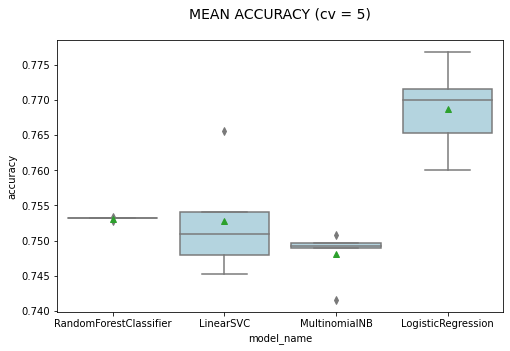

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [67]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               f3.index, test_size=0.2, 
                                                               random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1863
           1       0.85      0.21      0.34       210
           2       1.00      0.03      0.05        78
           3       0.76      0.19      0.30       131
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        23
           7       1.00      0.14      0.24        72
           8       0.91      0.25      0.39       115

    accuracy                           0.78      2505
   macro avg       0.59      0.20      0.24      2505
weighted avg       0.79      0.78      0.72      2505



C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Oracle']


In [57]:
import pickle

In [58]:
with open('category_model','wb') as f:
    pickle.dump(model,f)

In [59]:
with open('category_model','rb') as f:
    ml=pickle.load(f)

In [60]:
ml.predict(fitted_vectorizer.transform(["""Good morning,I have been locked out of my Right Now account"""]))

array(['Oracle'], dtype=object)